In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RootDir = "D:\\vision5"

RGBDir = RootDir + "\\RGB"
DepthDir = RootDir + "\\Depth"

In [100]:
#Random img
n = np.random.randint(0, 1979)
rgb = cv2.imread(RGBDir + f"\\{n}.png")
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
depth = cv2.imread(DepthDir + f"\\{n}.png")
depthHSV = cv2.cvtColor(depth, cv2.COLOR_BGR2HSV)
depthHSV[..., 1] = 255
depthHSV[..., 2] = 255
depth = cv2.cvtColor(depthHSV, cv2.COLOR_HSV2RGB)
hue_shift = 120
depthHSV[..., 0] = (-depthHSV[..., 0] + hue_shift) % 180
#depthHSV[..., 0] = 120
depthNew = cv2.cvtColor(depthHSV, cv2.COLOR_HSV2RGB)
print(n)

#0-120 0(Red)=3m 120(Blue)=0m

#REMAP depthNew 0(Red)=0m 120(Blue)=3m

893


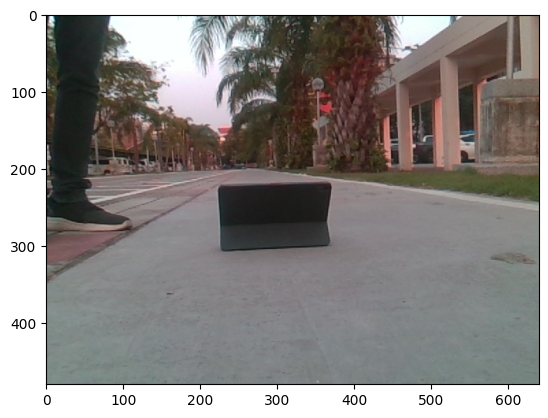

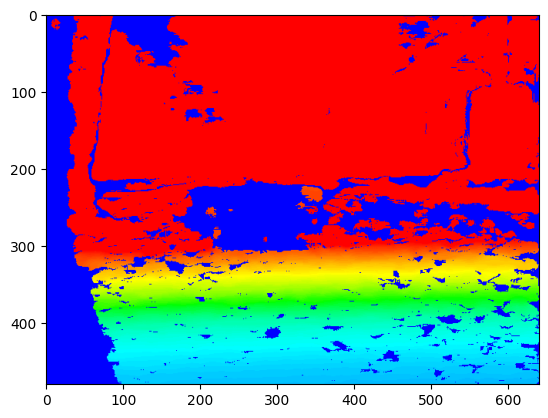

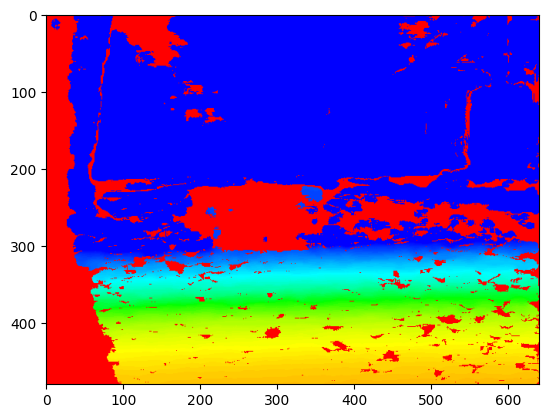

In [101]:
plt.subplots(1)
plt.imshow(rgb)
plt.subplots(1)
plt.imshow(depth)
plt.subplots(1)
plt.imshow(depthNew)

In [103]:
print(depthNew.shape)

(480, 640, 3)


In [112]:
y = 479
x = 300

hue_value = depthHSV[y, x, 0]
print("HUE:", hue_value)
print("DIST:", hue_value / 120 * 3)

HUE: 22
DIST: 0.5499999999999999


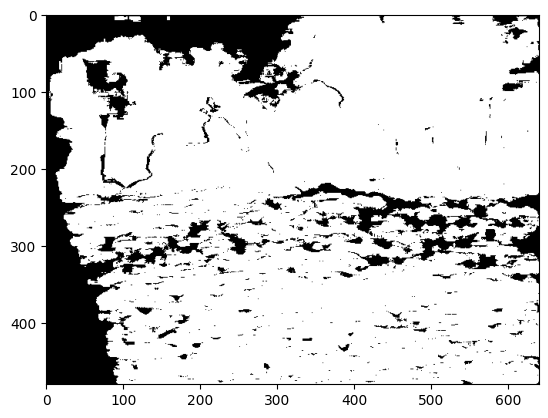

In [6]:
def remap_color_values(image, old_range=(0, 20), new_range=(0, 255)):
  """
  Remaps color values in the image from old_range to new_range.

  Args:
      image: The input image.
      old_range: The original value range (min, max).
      new_range: The desired value range (min, max).

  Returns:
      The image with remapped color values.
  """
  # Calculate scaling factor
  scale_factor = (new_range[1] - new_range[0]) / (old_range[1] - old_range[0])

  # Shift the values
  shift_value = new_range[0] - old_range[0] * scale_factor

  # Apply scaling and shifting to each channel
  return cv2.addWeighted(image, scale_factor, np.zeros_like(image), 0, shift_value)

# Example usage
remapped_image = remap_color_values(depth)
plt.imshow(remapped_image, cmap='gray')


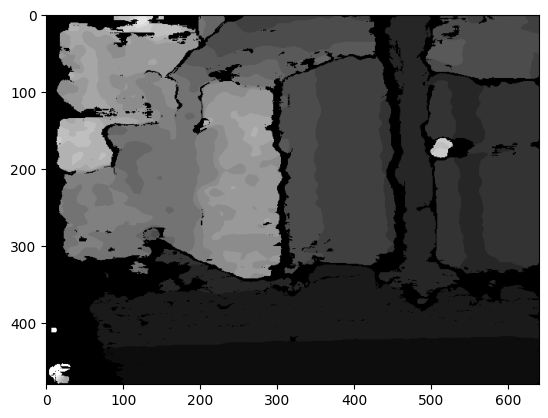

In [290]:
depth_blur = cv2.medianBlur(depth, 1)
depth_blur = remap_color_values(depth_blur)
plt.imshow(depth_blur, cmap='gray')

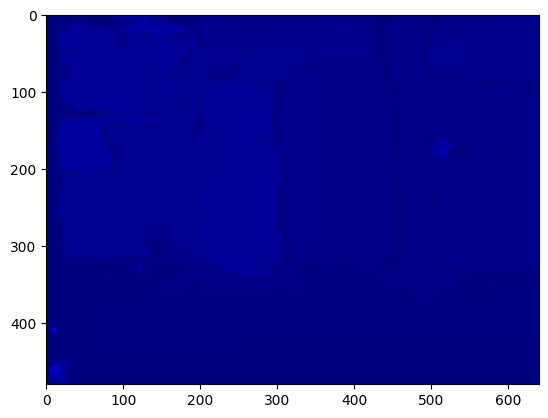

In [291]:
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.5), cv2.COLORMAP_JET)
depth_colormap = cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB)
plt.imshow(depth_colormap)